# Kotna korelacija anihilacijskih žarkov $\gamma$
#### Fizikalni praktikum 5, Luka Skeledžija, januar 2023

<style>
.MJXc-display{display: inline !important;}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}


</style>




# Uvod

Pozitron $e^+$, ki je po Diracu luknja v morju pozitivnih energij, se pri srečanju s svojim antidelcem elektronom $e^-$ anhiliria. Energija, ki se pri tem sprosti, se v prostor razširi v obliki elektromagnetnega valovanja. Raziskave pa so pokazale, da obstaja tudi vezan sistem  $e^+$ in  $e^-$, kjer delca krožita okoli skupnega težišča in se anhilirata pozneje. Tak sistem imenujemo pozitronij. Oglejmo si njegovo osnovno stanje, v katerem sta pozitron in elektron najbližje drug drugemu. Kot pri vodikovemu atomu ima to stanje tudi pri pozitroniju orbitalno vrtilno količino $l = 0$. Ker imata tako pozitron kot elektron osnovno spin enak 1/2, se osnovno stanje razcepi na dve podstanji. Eno ima vrtilno količino 0 (singlet), drugo pa 1 (triplet). Tripletno stanje je za približno $10^{−3}$ eV manj vezano kot singletno stanje. Anhilacija v singletnem stanju ima začetno vrtilno količino 0. Ker je vrtilna količina enaka 0, so si v prostoru vse smeri enakovredne. Pri anhilaciji nastali foton lahko odleti v katerokoli smer, vendar pa zaradi ohranitve gibalne količine pri anhilaciji ne more nastati le en foton. Istočasno mora nastati še eden in odleteti v nasprotno smer kot prvi. Kot pa se more ohranjati tudi vrtilna količina pred in po anhilaciji, pa mora veljati tudi to, da morata biti ob fotona ali levo ali desno cirkularno polarizirana. Pri anhilaciji v tripletnem stanju ohranitve gibalne količine niti vrtilne količine ne moremo doseči samo z dvema fotonoma. Nastati morajo najmanj trije fotoni, da se lahko količine ohranjajo. Če upoštevamo, da je verjetnost, da najdemo pozitronij v singletnem stanju 1/4 in verjetnost, da ga najdemo v tripletnem 3/4, bi pričakovali, da bomo bolj pogosto opazili anhilacijo v tri fotone kot v dva. V resnici pa ni tako. Upoštevati je namreč treba, da življenska doba pozitronija ni ista v obeh stanjih. V tripletnem stanju je življenska doba približno 1000-krat daljša. V tem času pa pozitronij doživi trke z atomi in pri tem iz tripletnega stanja preide v singletno. 

Pri vaji smo merili sunke s koincidenčnim vezjem. To je vezje, ki se sproži samo v primeru, da na vse njegove vhode pride signal znotraj karakterističnega časa $\tau$, ki je običajno precej manjši od povprečnega časa v katerem prihajajo sunki do vezja. Zato pravimo, da s takim vezjem ločimo istočasne dogodke od ostalih. Kot radioaktivni vir uporabljamo izotop ${}^{22}\text{Na}$, ki v 90,2 % primerov razpade z $\beta +$ razpadom, v 9,7 % primerov pa z ujetjem elektrona v vzbujeno jedro ${}^{22}\text{Na}$, ki z izsevanjem fotona preide v osnovno stanje. Preko razpada $\beta +$, ${}^{22}\text{Na}$ služi kot vir pozitronov. Pozitron se anhilira s elektronom, pri čemer hkrati nastaneta dva kolinearna fotona z energijo 511 keV, ki letita v nasprotno smer. Koincidence zaznanih fotonov smo izmerili z natančnim dvokanalnim časovnodigitalnim pretvornikom, krajše TDCjem, ki je na voljo na merilni platformi Red Pitaya.


# Naloga

1. Inicializirati časovno-digitalni pretvornik na plošči Red Pitaya in opraviti kalibracijo.
2. Izmeriti ločljivost časovno-digatalnega pretvornika.
3. Izmeriti porazdelitev časovnih intervalov med razpadi radioaktivnega vira. 
4. Poiskati koincidence anhilacijskih žarkov $\gamma$ in izmeriti njihovo kotno korelacijo.

# Potrebščine

- 2x scintilacijski detektor
- napajalnik
- TDC
- računalnik
- osciloskop
- ojačevalec, diskriminator
- zakasnilna enota
- pretvornik nivojev

![alt text](./shema.jpg "neki")
> Slika 1: Shema eksperimenta

<br>
<div class="pagebreak"></div>

# 1. Kalibracija detektorja








Pred pričetkom meritev je potrebno ustrezno ojačati in podaljšati trajanje sunkov iz scintilacijskega detektorja. Nato inicializiramo časovno-digitalni pretvornik na plošči Red Pitaya in opravimo kalibracijo *zakasnilne linije* v programu za zajem podatkov. 

![alt text](./sunki.jpg "neki")
> Slika 2: Sunki skozi čas na osciloskopu

Naš časovno-digitalni pretvornik (Time2Digital Converter - TDC) je implementiran v t.i. FPGA vezju. Za merjenje časa med dogodki lahko za manj precizne meritve uporabimo kar npr. štetje urinih ciklov, med katerimi bi morali biti pravilo konstantni časovni intervali. Vendar to v praksi ni povsem res. Za bolj precizne meritve uporabimo t.i. zakasnilno linijo, ki jo sestavlja 192 diskretnih elementov. Deluje na princupu časovne interpolacije. Ko na vhod TDCja pripeljemo sunek, se ta s končno hitrostjo propagira po zakasnilni liniji, stanje pa se vzorči ob naslednjem urinem pulzu. Iz prepotovane razdalje in hitrosti propagacije lahko natančno določimo čas med START in STOP pulzom. Nekateri zakasnilni elementi linije so "širši", zato je verjetnost, da v njih izmerimo sunek, večja. Linijo kalibriramo tako, da na vhod pripeljemo več naključnih koleriranih signalov in merimo, kje je sunkov v določenem trenutku več. Tam je linija "širša".   

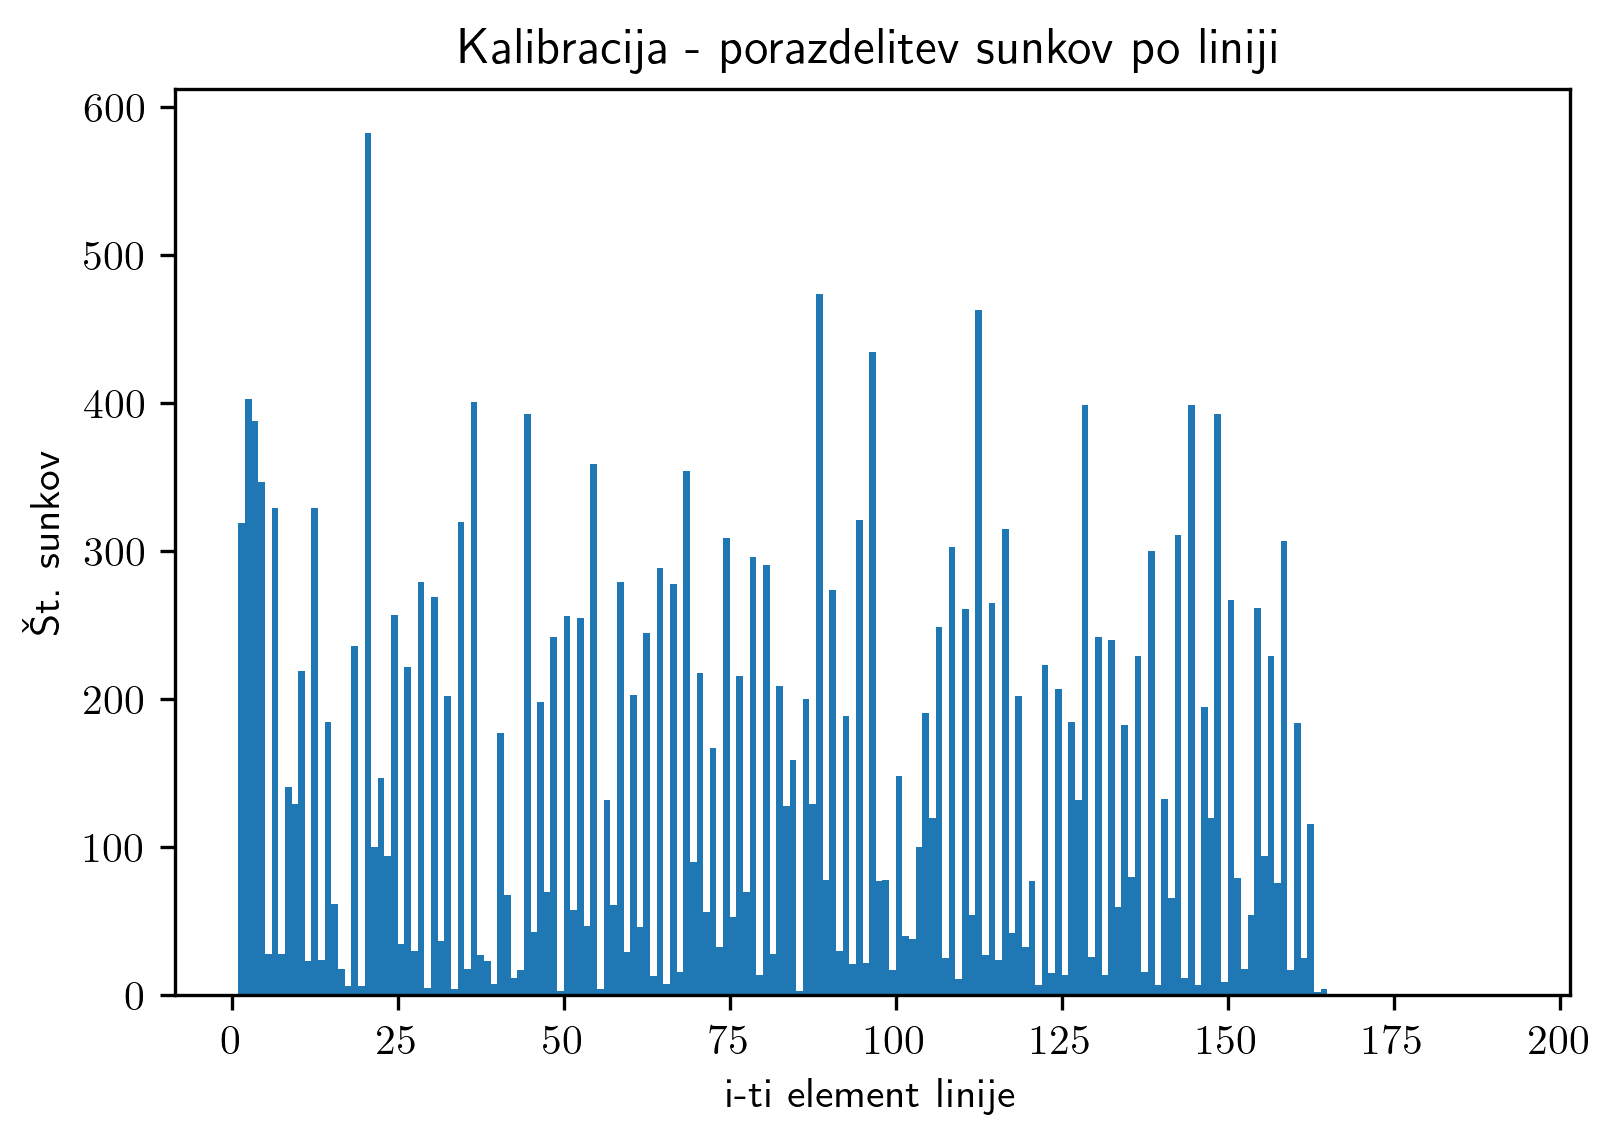

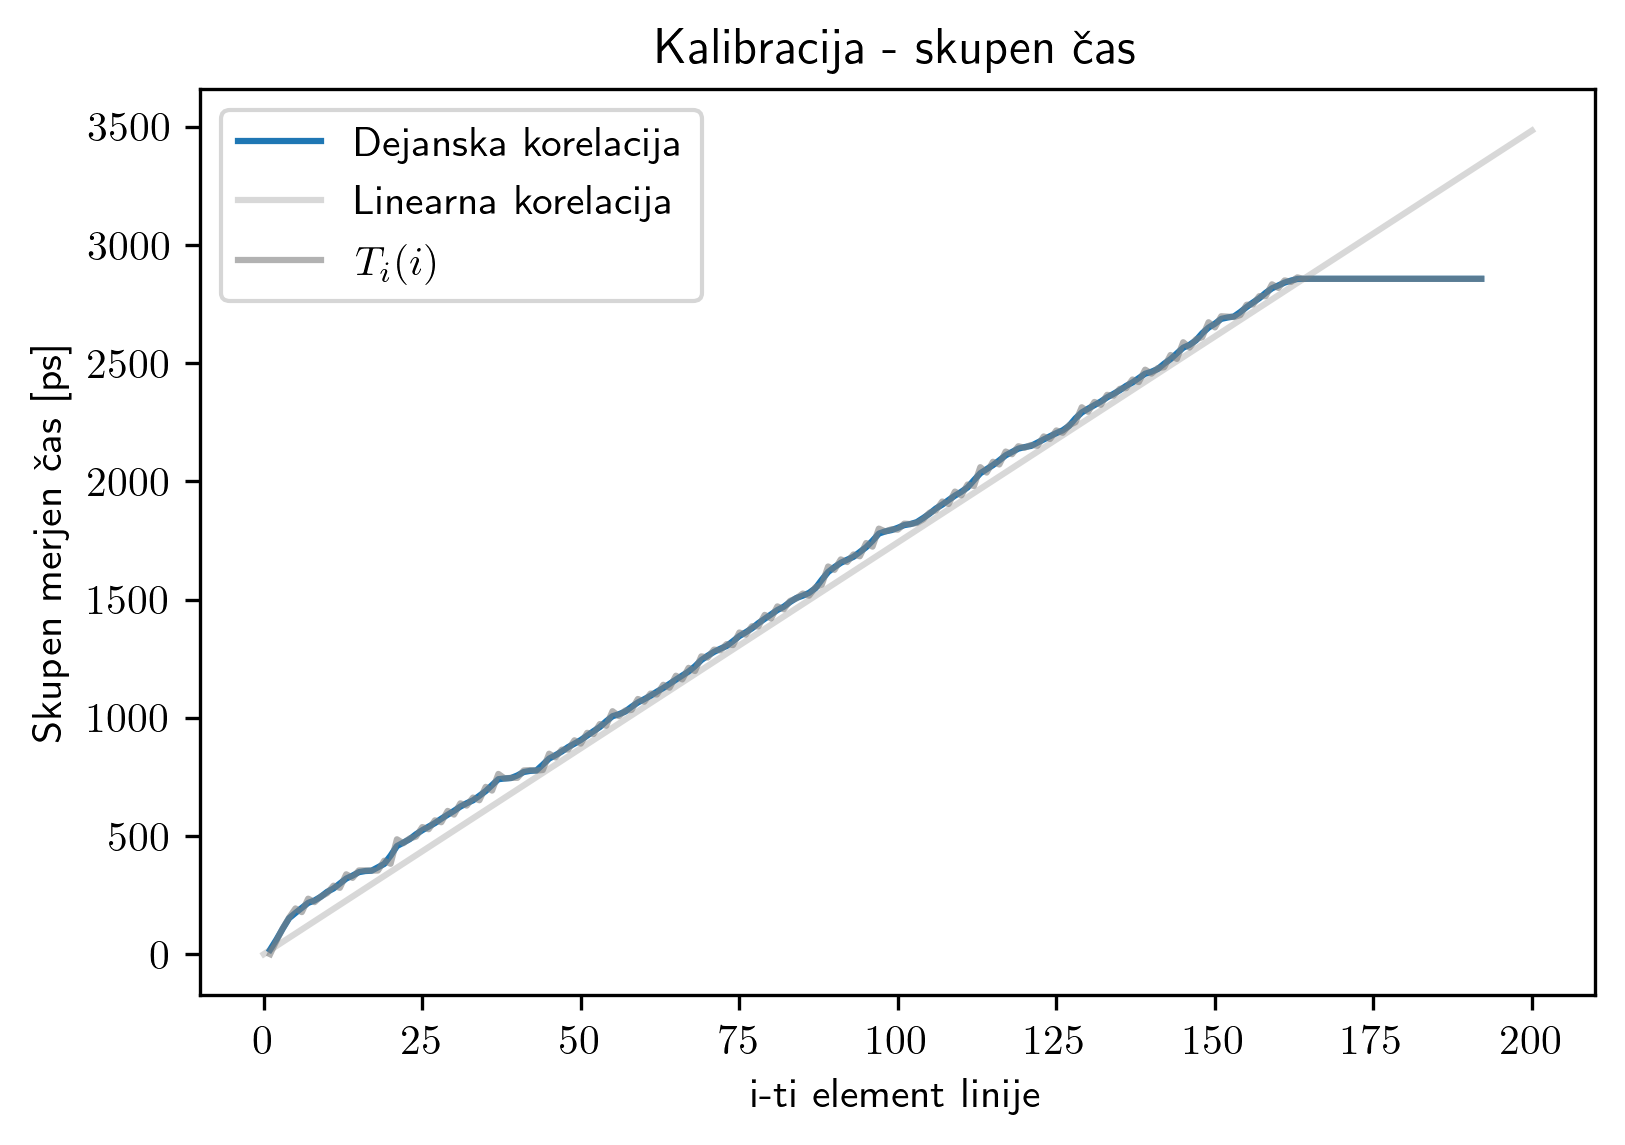

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Latex, Javascript

def centerHTML(html, text=""):
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

calibration = pd.read_csv('./data/calTDC0.txt',skiprows=5, delimiter='\t')

plt.title('Kalibracija - porazdelitev sunkov po liniji')
plt.xlabel('i-ti element linije')
plt.ylabel('Št. sunkov')
plt.stairs(calibration['Counts'][:-1], calibration['Bin'], fill=True, alpha=1)
plt.show()

plt.cla()

counts = calibration['Counts']
plt.title('Kalibracija - skupen čas')
plt.xlabel('i-ti element linije')
plt.ylabel('Skupen merjen čas [ps]')
plt.plot(calibration['Bin'], calibration['Time [ps]'], label="Dejanska korelacija")
sum = np.sum(counts)
T =  2856.91
W_is = counts / sum * T
W_is = np.pad(W_is, (1,1), 'constant', constant_values=(0,0))
T_is = np.cumsum(W_is) + (W_is / 2)
guideline = np.linspace(0, 200, 200)
k = calibration['Time [ps]'].to_numpy()[-1] / len(np.trim_zeros(calibration['Counts'].to_numpy(), 'b'))
plt.plot(guideline,k*guideline, color='gray', alpha=0.3, label="Linearna korelacija")
plt.plot(calibration['Bin'], T_is[:-2], color='gray', alpha=0.6, label="$T_i(i)$")
plt.legend()
plt.show()



Več preštetih sunkov na določenem odseku pomeni širšo linijo, enačba pa se v tem primeru glasi:

$W_i = \frac{N_i}{N} T,$

kjer je $N$ število vseh sunkov, $N_i$ število sunkov v i-tem delu linije ter $T$ perioda ure. Čas potovanja sunka po liniji je potem samo vsota prejšnjih:

$T_i = \sum_{i - 1}^{k = 1} W_k + \frac{W_i}{2}.$

# 2. Določanje ločljivosti

Ločljivost določimo tako, da na oba kanala pripeljemo identičen signal (iz iste enote). Pričakovali bi, da izmerimo ničelne časovne intervale - vendar temu v praksi ni tako. Dobimo neko porazrelitev okoli povprečne vrednosti in izračunamo standardno deviacijo $\sigma$. Sigma nam tako določa ločljivost meritve. Iz prileganja Gaussovke na porazdelitev dobimo; 

$$\sigma = (28.2 \pm 0.5) \, \text{ps} \approx 28 \, \text{ps}$$

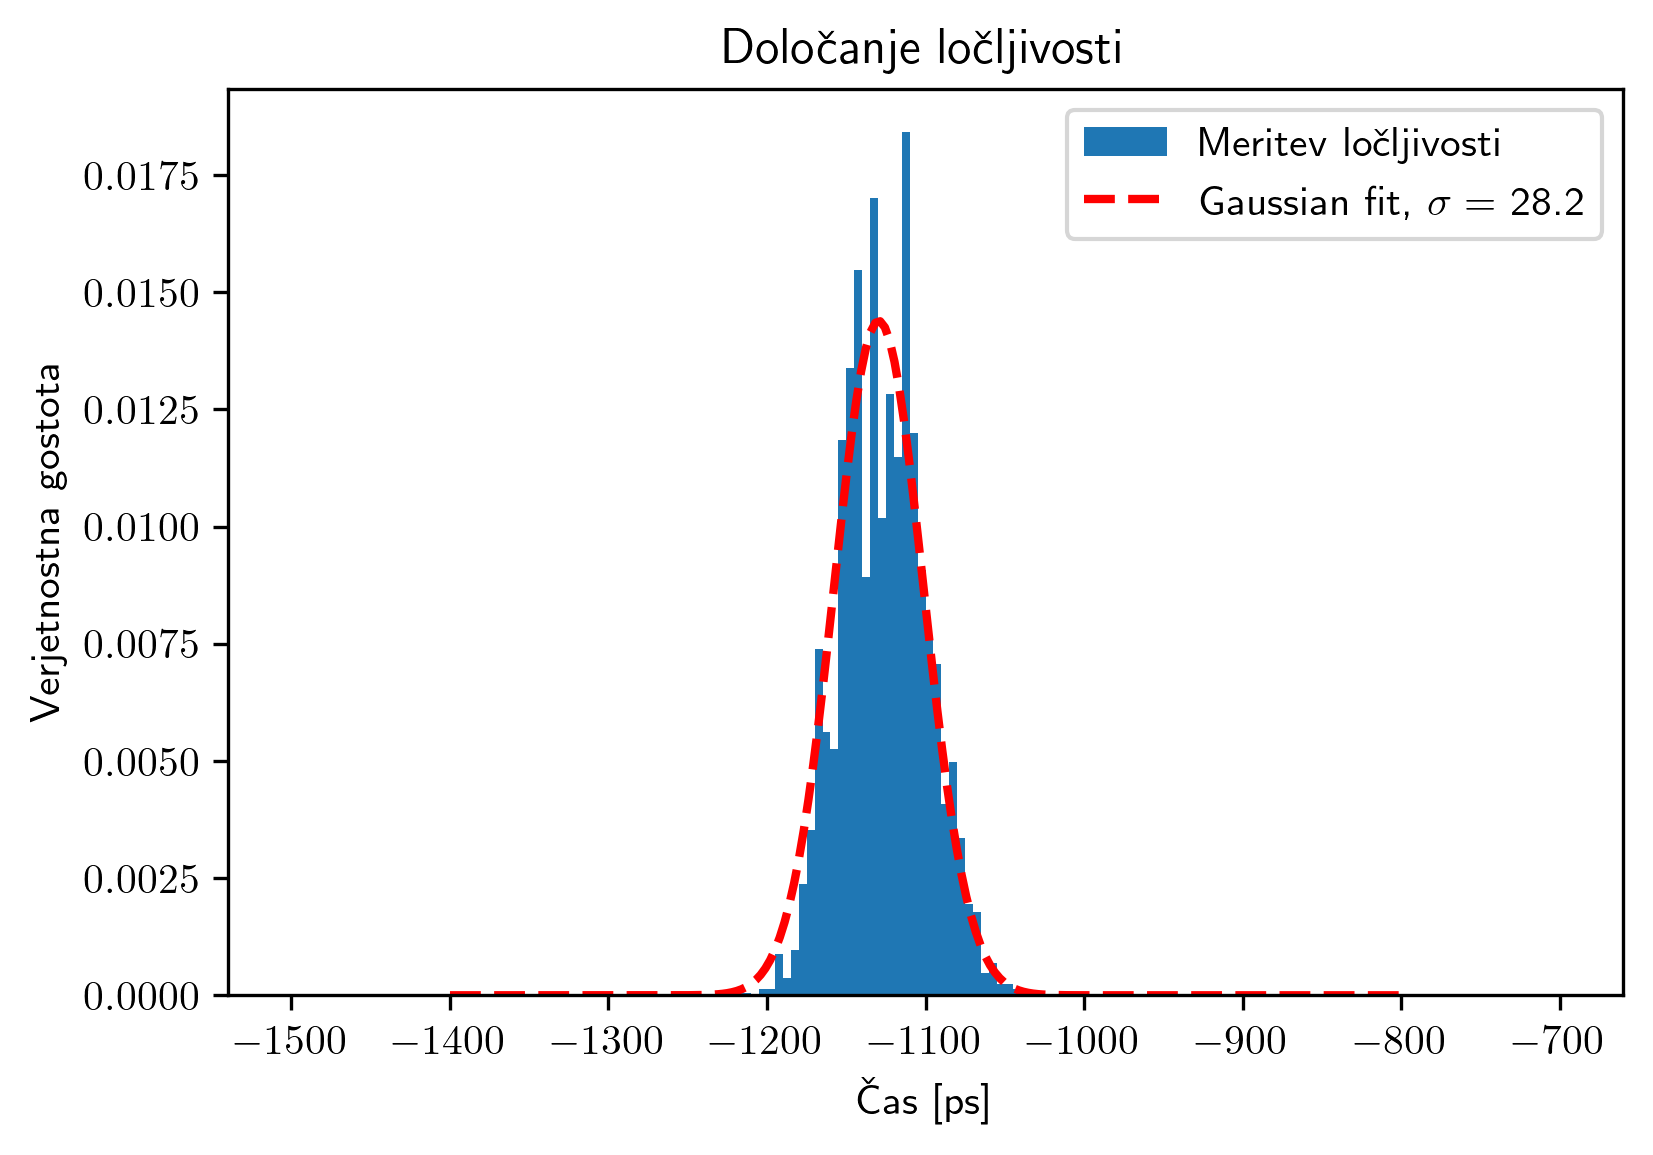

In [227]:
sigma = pd.read_csv('./data/napaka.txt',skiprows=11, delimiter='\t')

plt.title('Določanje ločljivosti')
plt.xlabel('Čas [ps]')
plt.ylabel('Verjetnostna gostota')
plt.stairs(sigma['PDF [1/ps]'][:-1], sigma['Time [ps]'], fill=True, alpha=1, label='Meritev ločljivosti')
dev = sigma['PDF [1/ps]']
bins = sigma['Time [ps]']

def gauss(x, exp_val, std_dev, scaling):
    return (scaling/(std_dev * np.sqrt( 2 * np.pi))) * np.exp(-1/2 * (x - exp_val)**2 / std_dev**2)

import scipy.optimize as opt

k, _ = opt.curve_fit(gauss, xdata=bins, ydata=dev, p0=[-1000,16,1])
x_gauss = np.linspace(-1400, -800, 200)
l = plt.plot(x_gauss, gauss(x_gauss, *k), 'r--', linewidth=2, label=f'Gaussian fit, $\sigma = $ {round(k[1], 1)}')
plt.legend()
plt.show()


# 2. Radioaktivni razpad

Nadaljujemo s preprosto enokanalno meritvijo sunkov iz radioaktivnega vira. Radioaktiven razpad smatramo za Poissonski proces, na kar nas spominja tudi oblika porazrelitve. Za Poissonovo porazdelitev velja:

$P_N^{\overline{N}} = \frac{\overline{N}^N}{N!} e^{-Rt},$

kjer je $P$ verjetnost, da se v nekem časovnem intervalu zgodi N dogodkov, pri čemer jih v povprečju pričakujemo $\overline{N}$. Naša naloga je izmeriti verjetnostno gostoto za porazdelitev časa med razpadi. Verjetnost, da izmerimo v času $t$ več kot nič sunkov izračunamo kot:

$p = 1 - P_0^{\overline{N}} = 1 - e^{-Rt}$.

Iz tega sledi, da je verjetnostna gostota enaka $\frac{dp}{dt} = Re^{-Rt}$. Grafu lahko tedaj v logaritemski skali prilagodimo premico ter tako določimo aktivnost vzorca. Alternativno lahko preštejemo število razpadov v celotnem intervalu ter primarjamo številki. Dobimo:

$R_{\text{premica}} = (148 \pm 5) \, s^{-1}$

$R_{\text{štetje}} \approx 149 \, s^{-1}$

Ugotovimo, da se številki dobro ujemata.

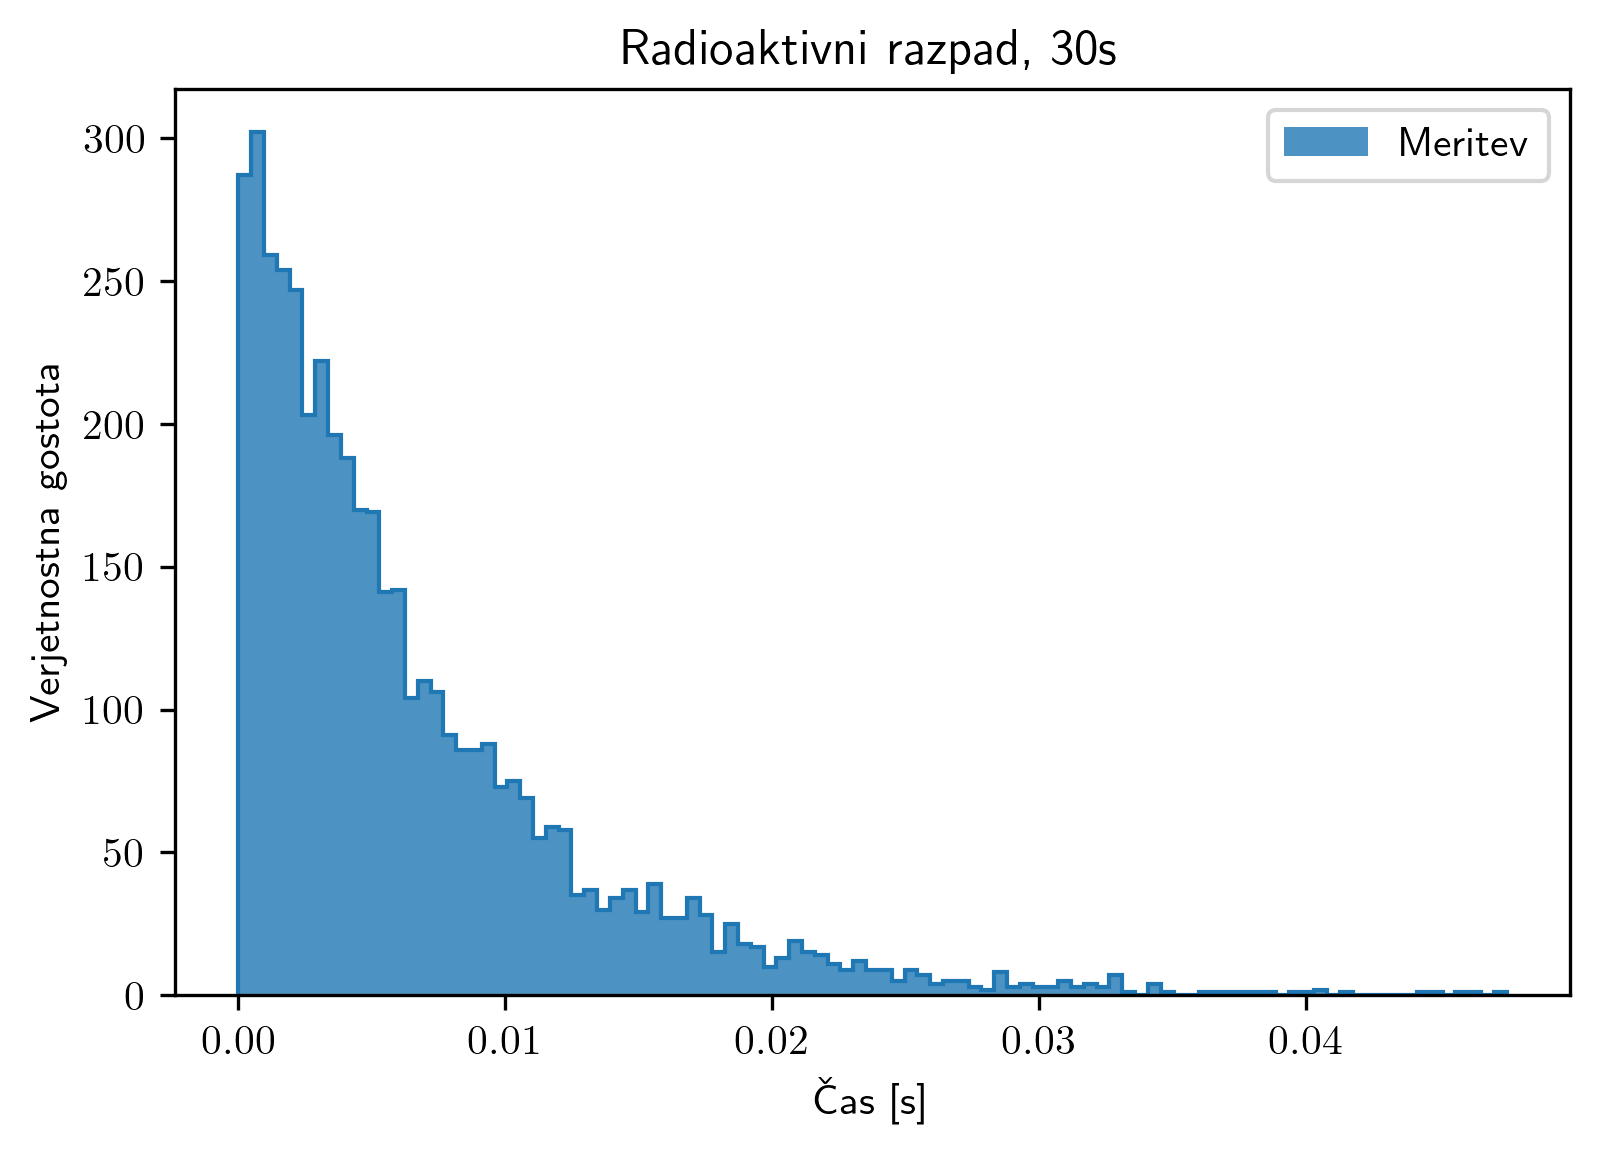

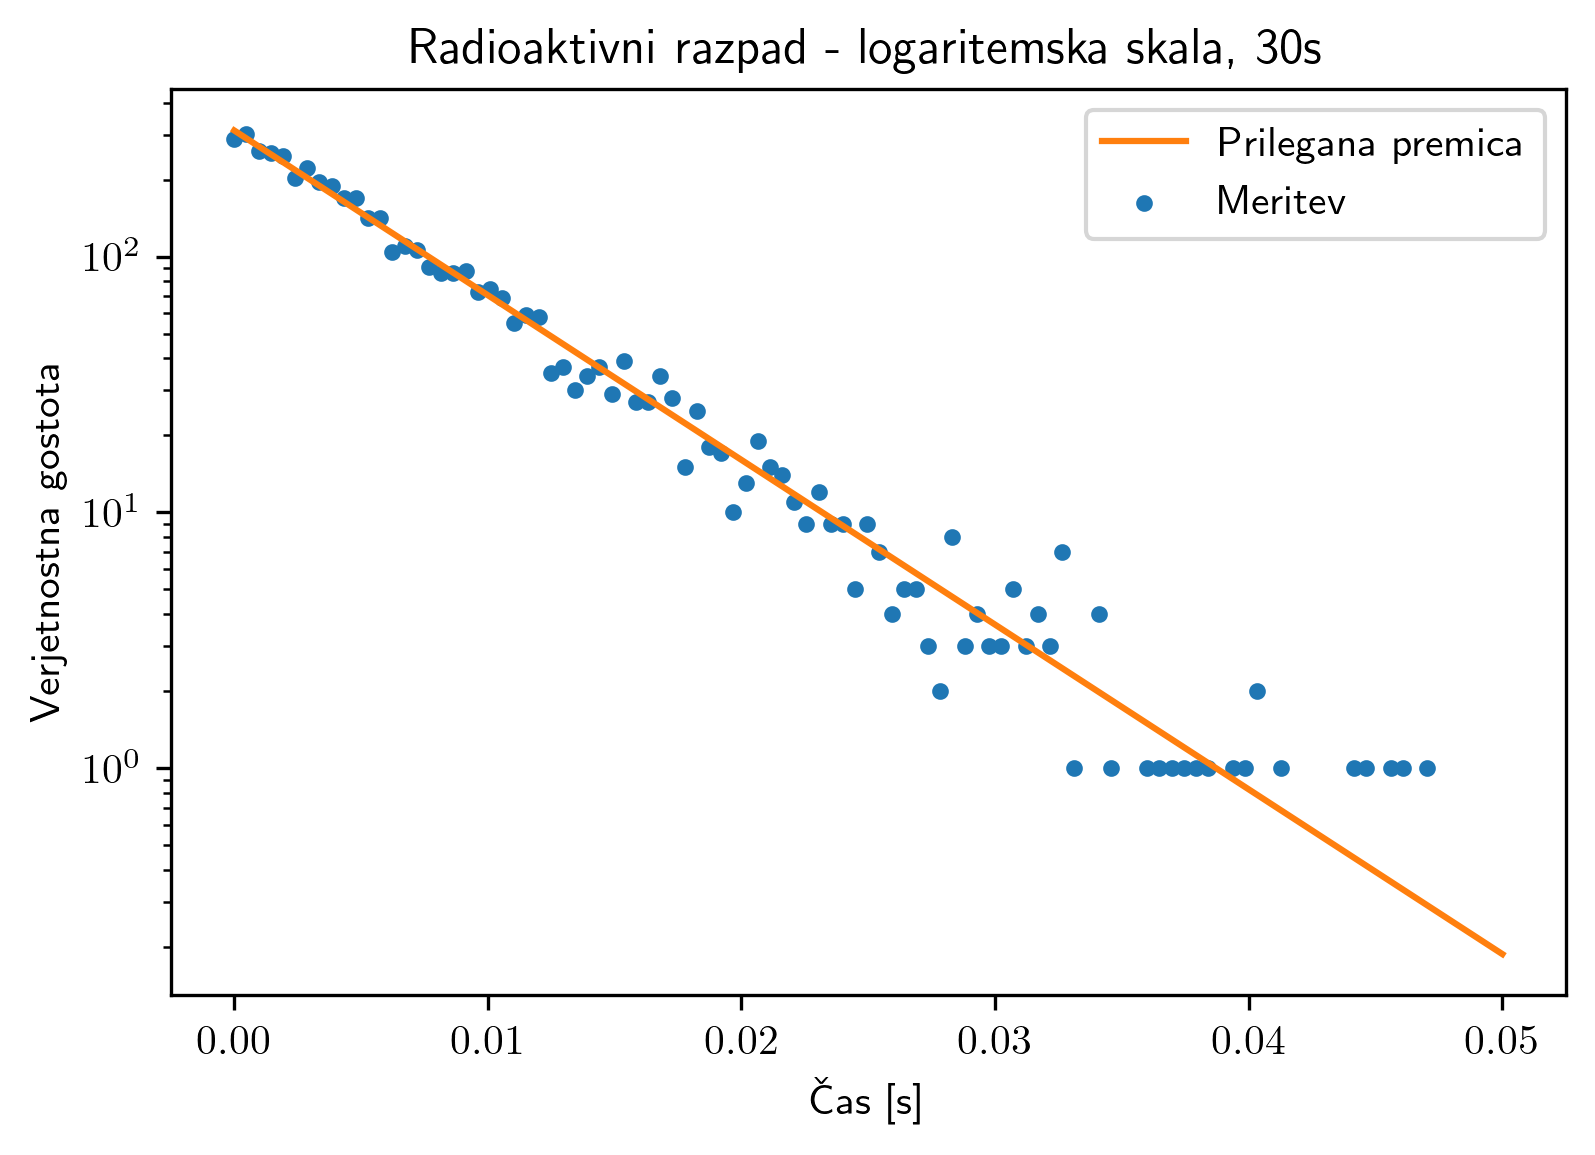

In [8]:
decay = pd.read_csv('./data/dt1td1.txt',skiprows=11, delimiter='\t')
dev = decay['Counts']
bins = decay['Time [ms]'] / 1000

plt.title('Radioaktivni razpad, 30s')
plt.xlabel('Čas [s]')
plt.ylabel('Verjetnostna gostota')
plt.stairs(dev[:-1], bins, fill=True, alpha=0.8, label='Meritev')
plt.stairs(dev[:-1], bins, alpha=1, color='tab:blue')

plt.legend()
plt.show()

import scipy.optimize as opt

def f_e(x, R, A):
    return A * R * np.e**(-R*x)

def log_f(x, R, n):
    return np.log(R) - x*R + n

f = dev > 0
log_bins = bins[f]
log_dev = dev[f]
k, _ = opt.curve_fit(f_e, xdata=log_bins, ydata=log_dev, bounds=([0.001, -np.inf], [np.inf, np.inf]))
plt.title('Radioaktivni razpad - logaritemska skala, 30s')
plt.xlabel('Čas [s]')
plt.ylabel('Verjetnostna gostota')
#plt.stairs(dev[:-1], bins, fill=True, alpha=0.8, label='Meritev razpada')
#plt.stairs(log_dev[:-1], log_bins, alpha=1, color='tab:blue')

x_fit = np.linspace(0, 0.05, 100)
plt.plot(x_fit, f_e(x_fit, *k), label='Prilegana premica', color="tab:orange")

plt.scatter(bins, dev, marker='.', label="Meritev")

plt.yscale('log')
plt.legend()
plt.show()



# 3. Koincidence

V tem delu obravnavamo koincidenco detektiranih žarkov $\gamma$, ko sta detektorja kolinearna. Meritev opravljamo dvokanalno. Scintilatorja postavimo blizu izvora, da zajamemo čim večji prostorski kot (v nadaljevanju bomo ugotovili, da je bila naša postavitev slaba in detektorja nisba bila zares "blizu"). Gumb DELAY nastavimo na minimum in detektiramo čase med dvema sunkoma iz katerega koli detektorja. Dobimo spodnjo porazrelitev v merilnem oknu $\tau$, $\tau = 500 \, \text{ns}$. 

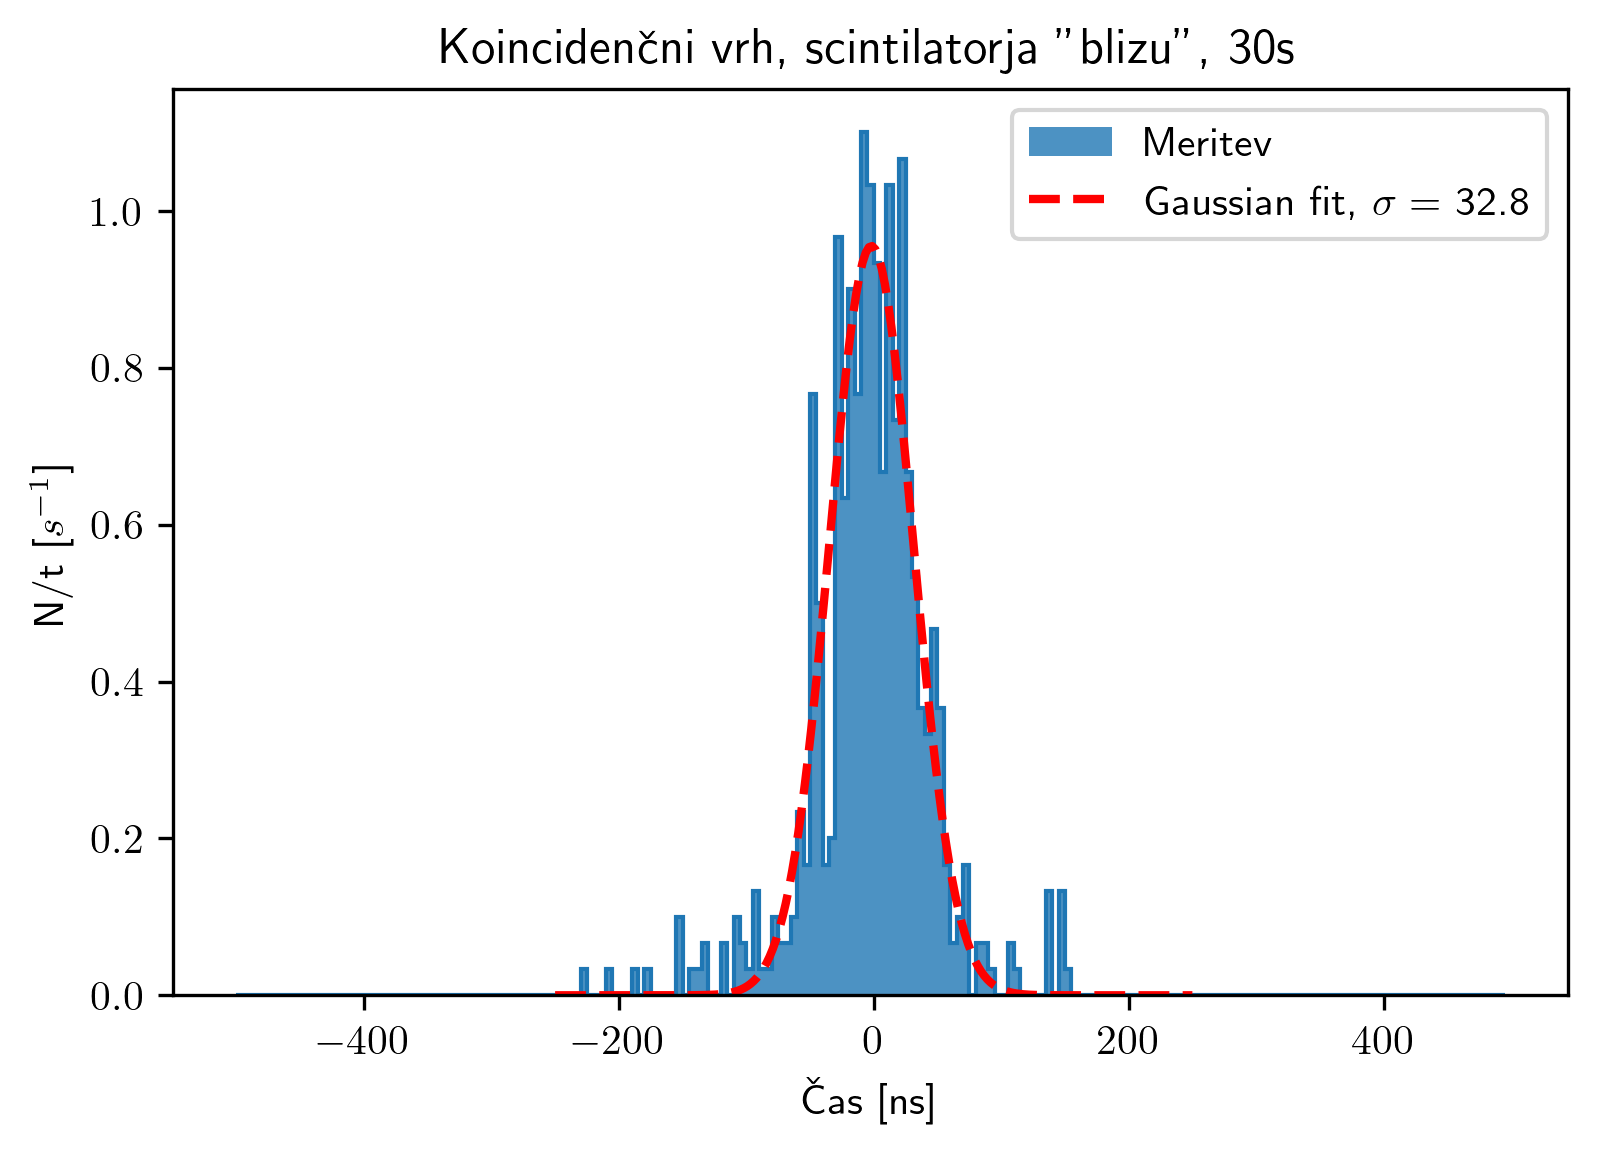

In [229]:
decay = pd.read_csv('./data/primerjava-0d-questionmark.txt',skiprows=11, delimiter='\t')
dev = decay['Counts'] / 30
bins = decay['Time [ns]']

plt.title('Koincidenčni vrh, scintilatorja "blizu", 30s')
plt.xlabel('Čas [ns]')
plt.ylabel('N/t [$s^{-1}$]')
plt.stairs(dev[:-1], bins, fill=True, alpha=0.8, label='Meritev')
plt.stairs(dev[:-1], bins, alpha=1, color='tab:blue')

def gauss(x, exp_val, std_dev, scaling):
    return (scaling/(std_dev * np.sqrt( 2 * np.pi))) * np.exp(-1/2 * (x - exp_val)**2 / std_dev**2)

import scipy.optimize as opt

k, _ = opt.curve_fit(gauss, xdata=bins, ydata=dev, p0=[0,16,1])
x_gauss = np.linspace(-250, 250 , 200)
l = plt.plot(x_gauss, gauss(x_gauss, *k), 'r--', linewidth=2, label=f'Gaussian fit, $\sigma = $ {round(k[1], 1)}')
plt.legend()
plt.show()

Vemo, da je nekaj koincidenc v izbranem oknu tudi naključnih. Koincidenčni vrh odpeljemo daleč stran s gumbom DELAY oz. (to smo storili v tem primeru) samo merimo območje daleč stran od koincidenčnega vrha. Hitrost sunkov v taki postavitvi lahko napovemo z enačbo: 

$R_{12} = R_1 R_2 \tau $,

kjer je $R_{12}$ hitrost naključnih suknov ter $R_1$ ter $R_2$ hitrost sunkov na kanalu 1 in 2. Zaradi simetrije privzamemo $R_1 = R_2$. Izračunamo hitrost naključnih sunkov ter jo primerjamo z izmerjeno:

$ R_{12 \, \text{napovedana}}= 0.011 \, \text{s}^{-1} $

$ R_{12 \, \text{izmerjena}}= 0.055 \, \text{s}^{-1} $

Ugotovimo, da je izmerjena hitrost sunkov približno 5-krat večja od napovedane. O vzrokih se tokrat ne sprašujemo...

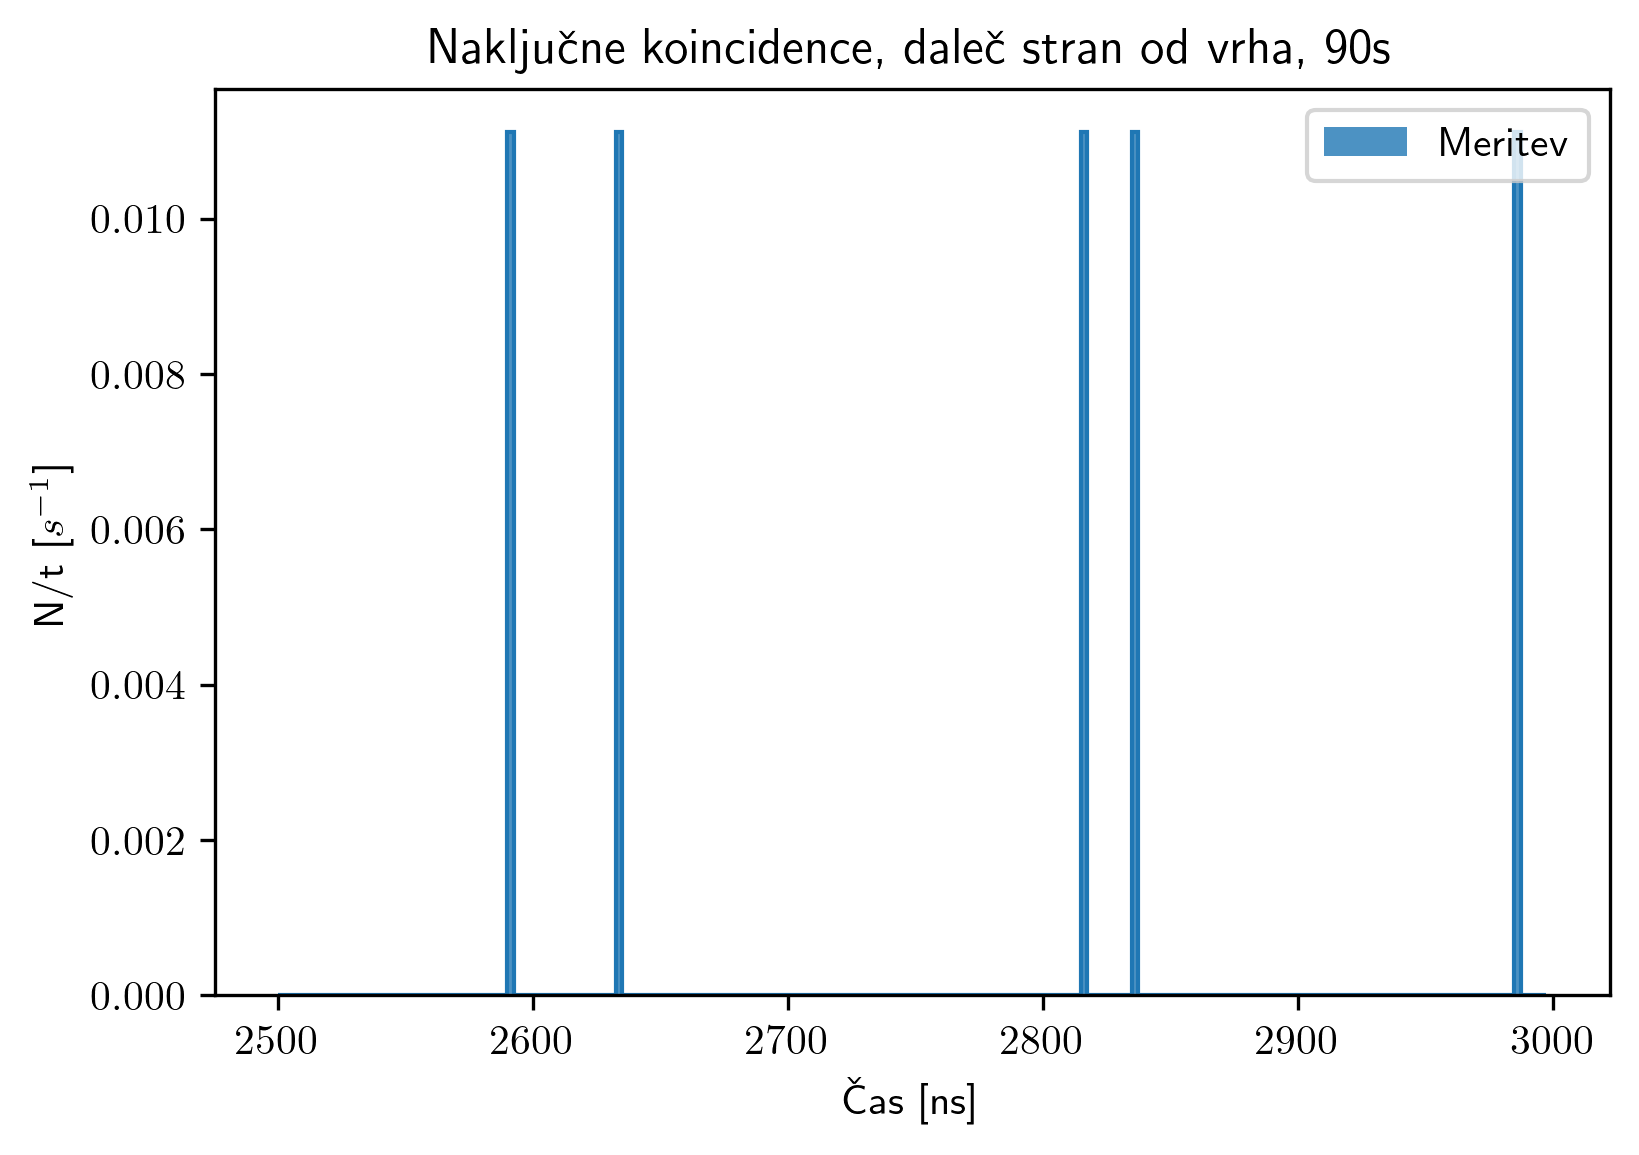

In [230]:
decay = pd.read_csv('./data/okno_blizja_pozicija.txt',skiprows=11, delimiter='\t')
dev = decay['Counts'] / 90
bins = decay['Time [ns]']

plt.title('Naključne koincidence, daleč stran od vrha, 90s')
plt.xlabel('Čas [ns]')
plt.ylabel('N/t [$s^{-1}$]')
plt.stairs(dev[:-1], bins, fill=True, alpha=0.8, label='Meritev')
plt.stairs(dev[:-1], bins, alpha=1, color='tab:blue')

def gauss(x, exp_val, std_dev, scaling):
    return (scaling/(std_dev * np.sqrt( 2 * np.pi))) * np.exp(-1/2 * (x - exp_val)**2 / std_dev**2)

import scipy.optimize as opt

#k, _ = opt.curve_fit(gauss, xdata=bins, ydata=dev, p0=[0,16,1])
x_gauss = np.linspace(-250, 250 , 200)
#l = plt.plot(x_gauss, gauss(x_gauss, *k), 'r--', linewidth=2, label=f'Gaussian fit, $\sigma = $ {round(k[1], 1)}')
plt.legend()
plt.show()

# 4. Kotna korelacija anihilacijskih žarkov $\gamma$

Zanima nas še kotna korelacija anihilacijskih žarkov. Detektorja odmaknemo stran, da povečamo kotno ločljivost (fiksna širina detektorja dlje stran predstavlja manjši zorni kot). Merimo v intervalih po $5^{\circ}$. Za kot $0^{\circ}$ izračunamo še širino porazdelitve. Ugotovimo, da porazdelitev ni bistveno drugačna od meritve iz točke 3. Sklepamo, da bi na večji razdalji morali izmeriti manj sunkov, torej premik iz blizu na daleč ni bil zares velik. Vendar nas to v nedeljo zvečer pretirano ne moti. Izrišemo še graf kotne odvisnosti koincidenc (torej števila vseh sunkov na sekundo). Ugotovimo, da za kote blizu $0^{\circ}$ število sunkov pada počasi, nato pa se približa vrednosti 0, ki je ne dosežemo zaradi sipanja žarkov $\gamma$ ter naključnih sunkov.

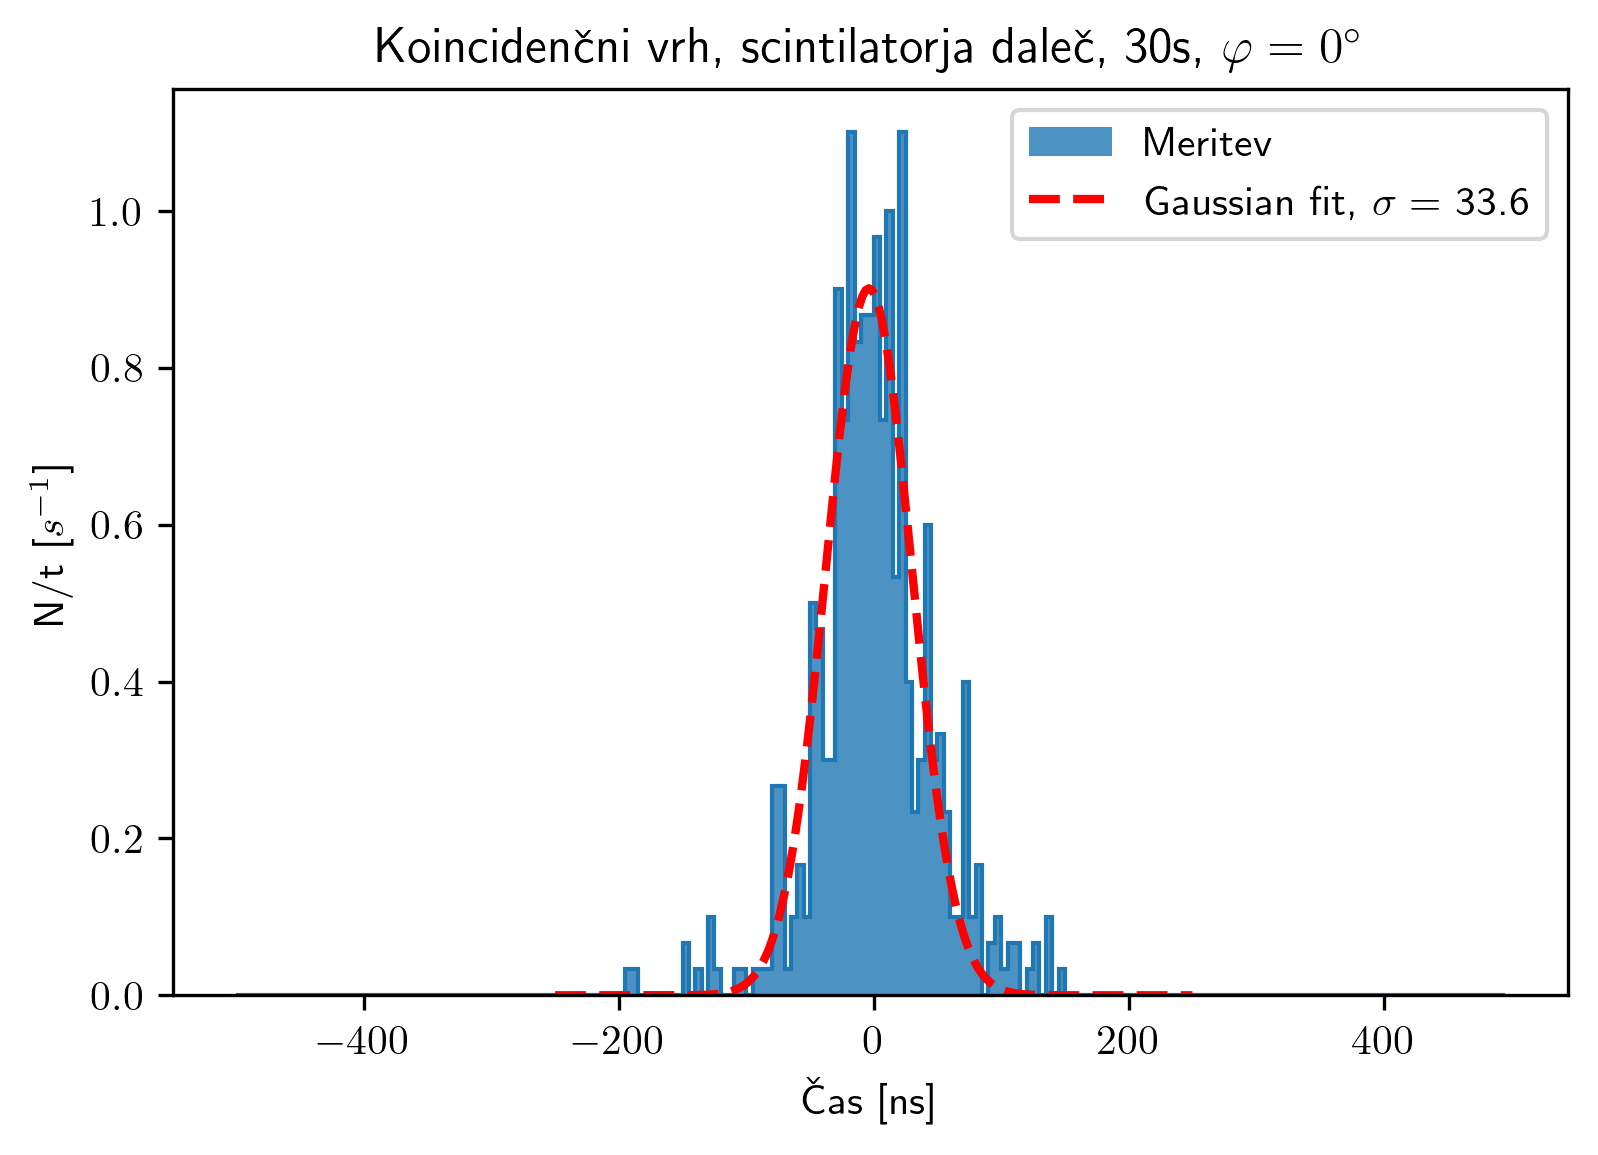

In [231]:
decay = pd.read_csv('./data/0d.txt',skiprows=11, delimiter='\t')
dev = decay['Counts'] / 30
bins = decay['Time [ns]']

plt.title('Koincidenčni vrh, scintilatorja daleč, 30s, $\\varphi = 0^{\circ}$')
plt.xlabel('Čas [ns]')
plt.ylabel('N/t [$s^{-1}$]')
plt.stairs(dev[:-1], bins, fill=True, alpha=0.8, label='Meritev')
plt.stairs(dev[:-1], bins, alpha=1, color='tab:blue')

def gauss(x, exp_val, std_dev, scaling):
    return (scaling/(std_dev * np.sqrt( 2 * np.pi))) * np.exp(-1/2 * (x - exp_val)**2 / std_dev**2)

import scipy.optimize as opt

k, _ = opt.curve_fit(gauss, xdata=bins, ydata=dev, p0=[0,16,1])
x_gauss = np.linspace(-250, 250 , 200)
l = plt.plot(x_gauss, gauss(x_gauss, *k), 'r--', linewidth=2, label=f'Gaussian fit, $\sigma = $ {round(k[1], 1)}')
plt.legend()
plt.show()

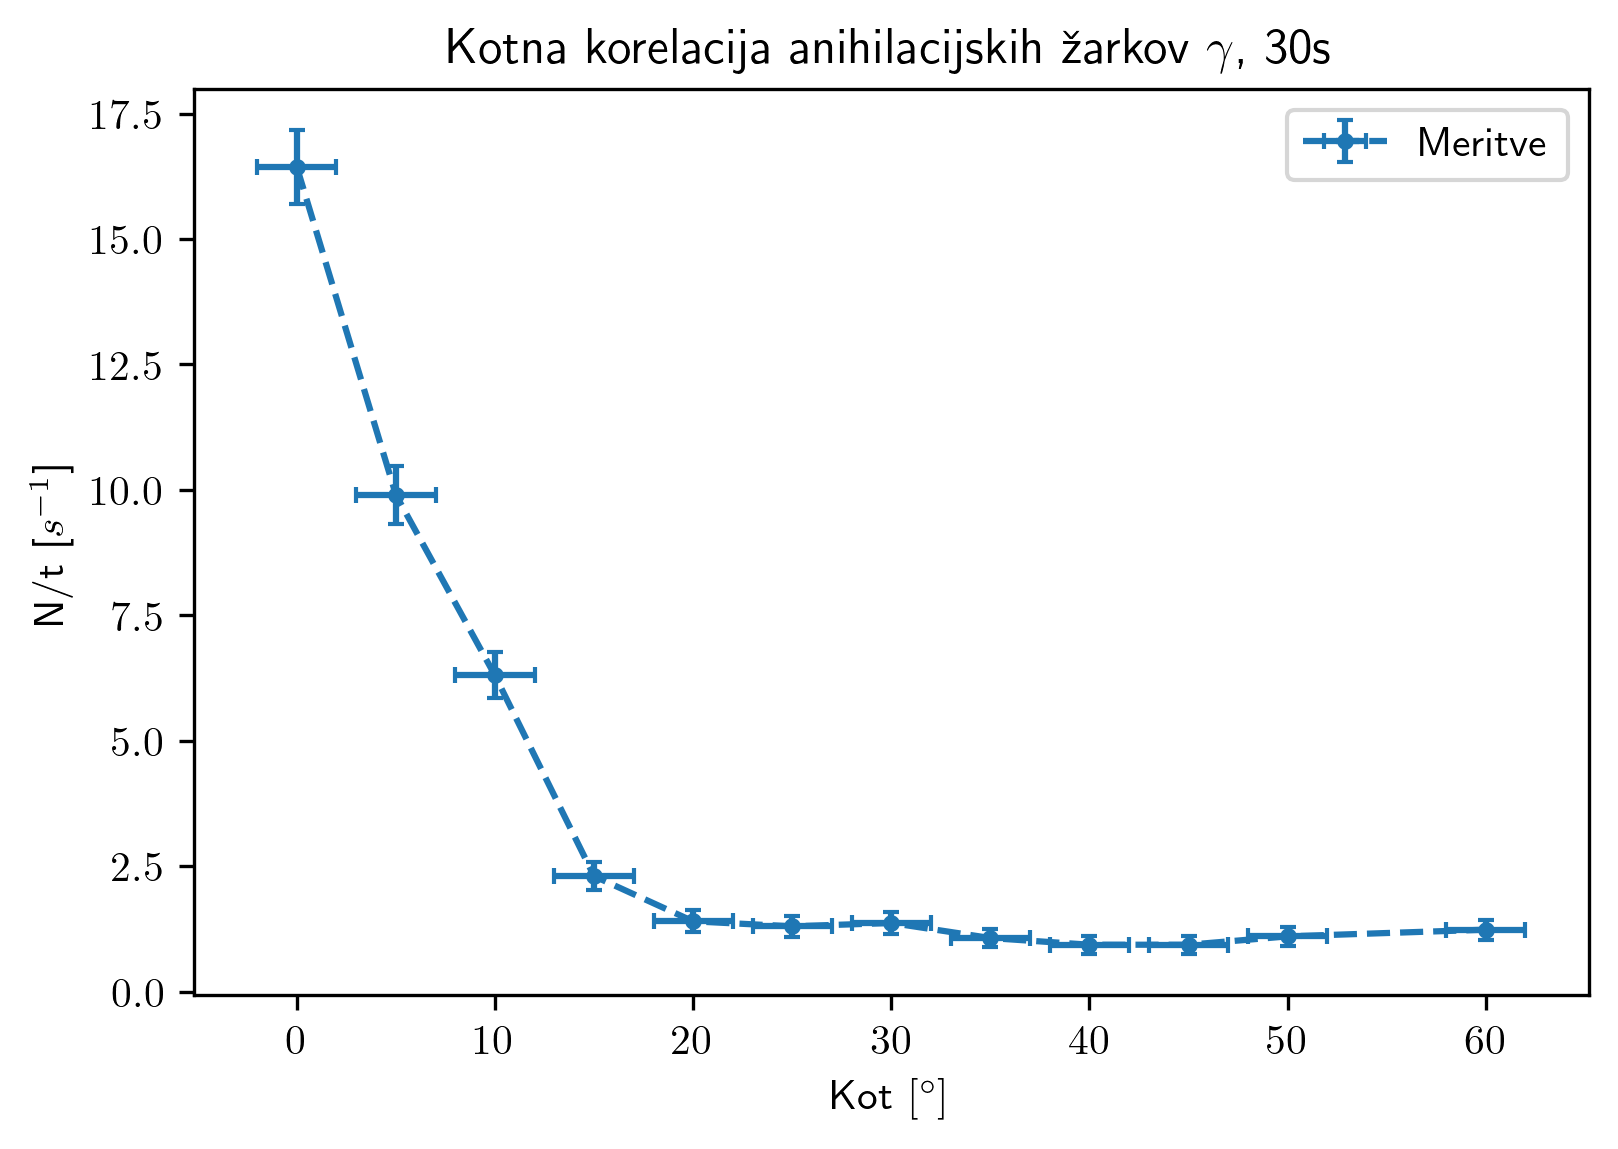

In [11]:
angles = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60]
counts = []
for fn in angles:
    decay = pd.read_csv(f'./data/{fn}d.txt',skiprows=11, delimiter='\t')
    dev = decay['Counts']
    counts.append(np.sum(dev))
counts = np.array(counts)
counts = counts / 30
plt.errorbar(angles, counts, marker='.', label="Meritve", yerr=np.sqrt(counts) / np.sqrt(30), xerr=2, capsize=2, linestyle='--')
plt.title('Kotna korelacija anihilacijskih žarkov $\gamma$, 30s')
plt.xlabel('Kot $[{}^{\circ}]$')
plt.ylabel('N/t [$s^{-1}$]')
plt.legend()
plt.show()